In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
def CorrelationHeatmap(df):
    corr = df.corr()
#     print(corr)
    plt.figure(figsize=(8,8))
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    
def NumericalFeatureHistogram(df, datatype):
    if datatype == "bike":
        df.hist(column=["temp", "atemp", "hum", "windspeed"], ec='black', grid=False, figsize=(10,10))
    elif datatype == "video":
        df.hist(figsize=(15, 15), layout=(6, 3), ec='black', grid=False, column=["duration", "height", "width", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", "b_size", "size", "o_bitrate", "o_framerate", "o_width", "o_height"])
    
def CategoricalFeatureBoxplot(df, datatype):
    if datatype == "bike":
        for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
            df.boxplot(by=col, column=["casual", "registered", "cnt"], figsize=(15,6), layout=(1,3))
    elif datatype == "video":
        for col in ["codec", "o_codec"]:
            df.boxplot(by=col, column="utime", figsize=(6,6))

In [3]:
bike_df = pd.read_csv("Bike-Sharing-Dataset/day.csv")
print(bike_df.head(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


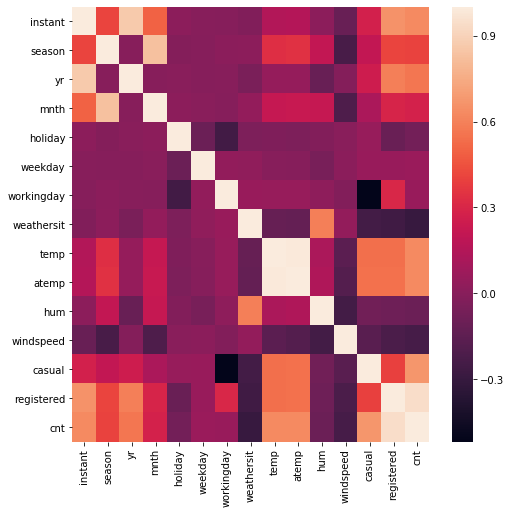

In [4]:
CorrelationHeatmap(bike_df)

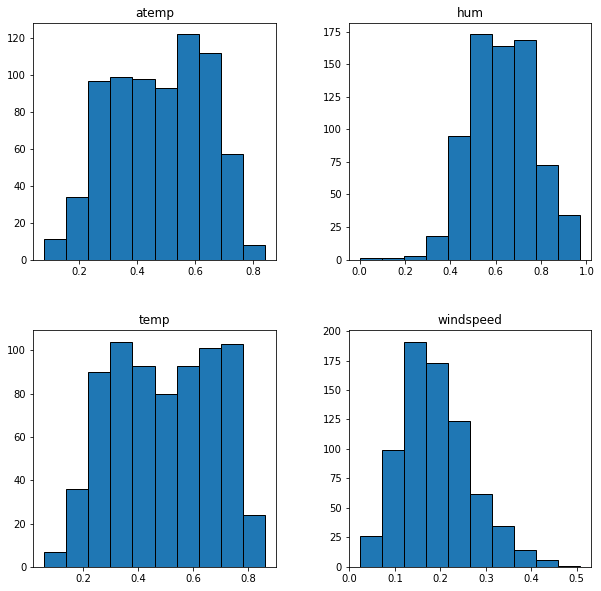

In [5]:
NumericalFeatureHistogram(bike_df, "bike")

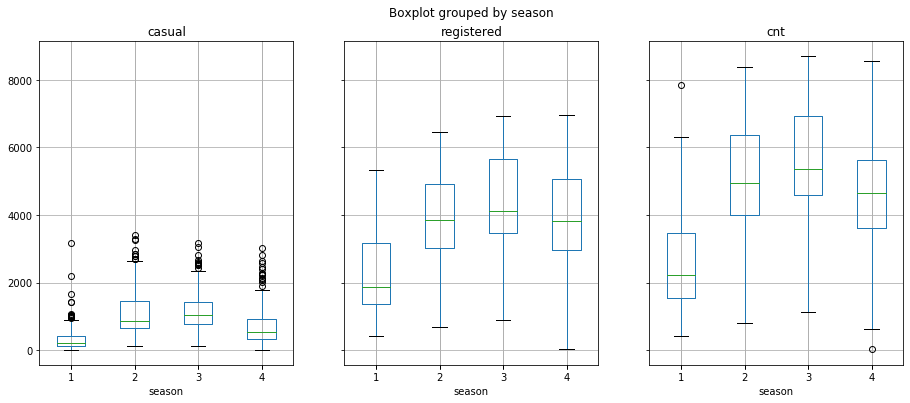

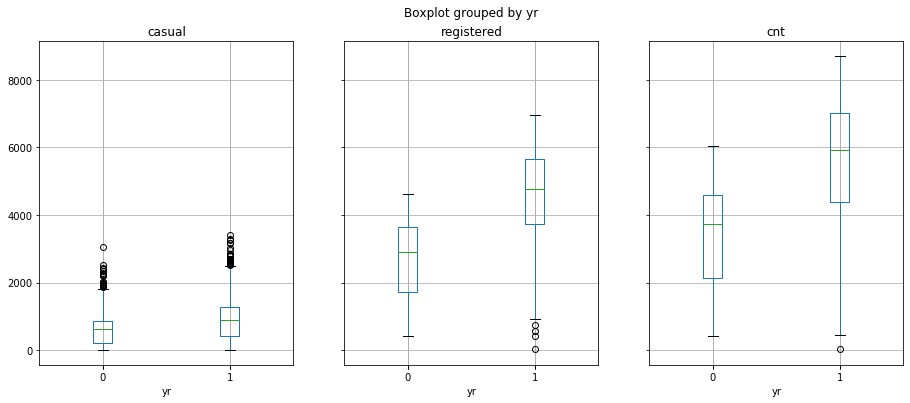

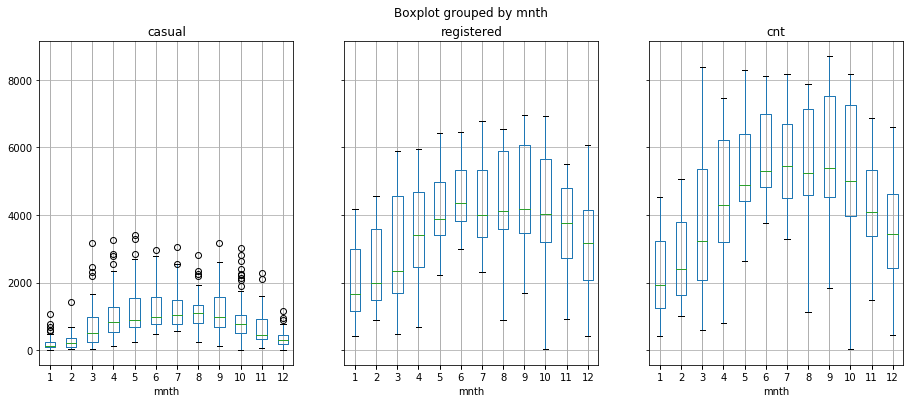

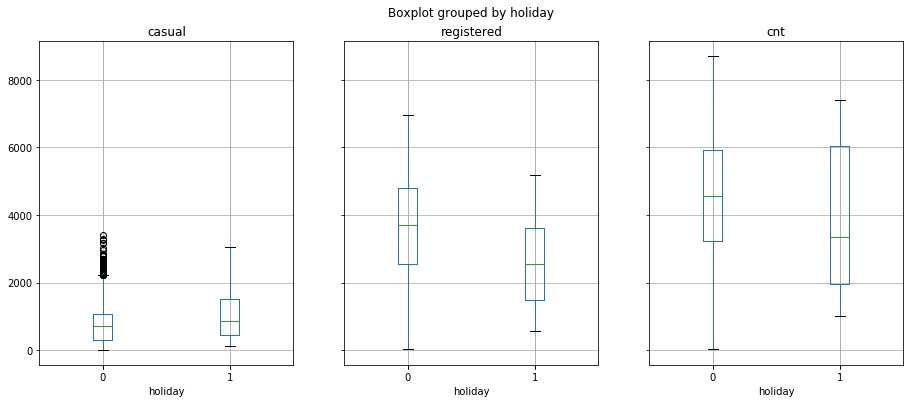

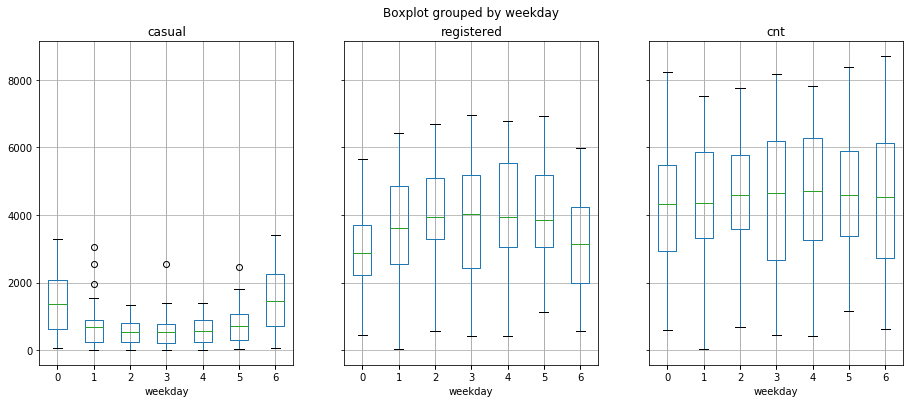

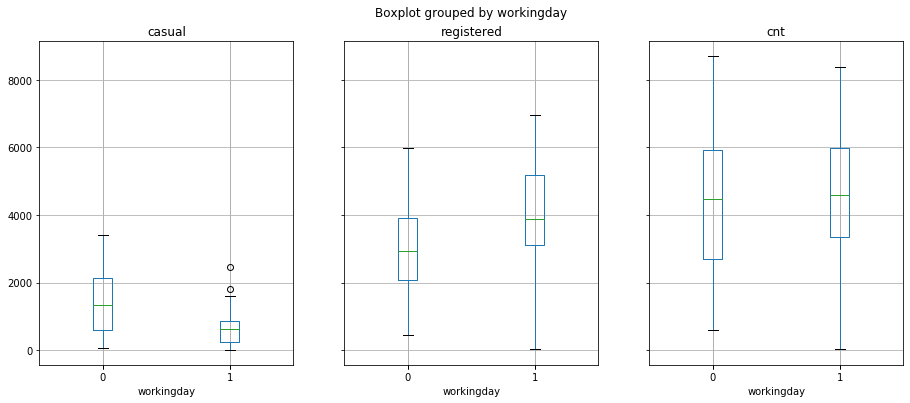

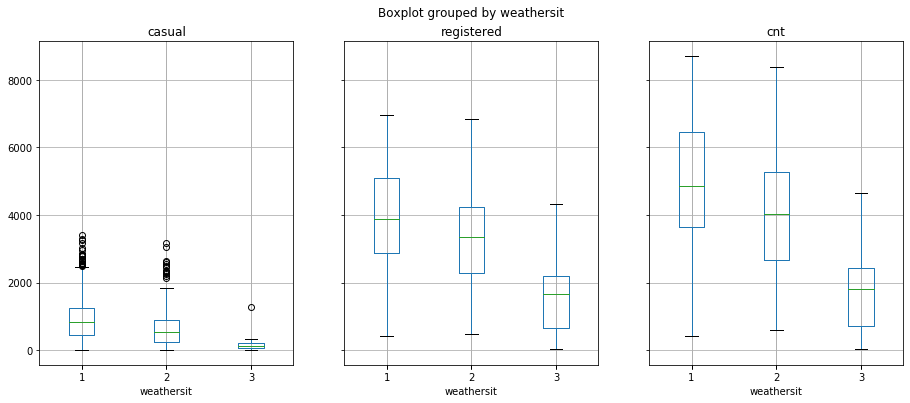

In [6]:
CategoricalFeatureBoxplot(bike_df, "bike")

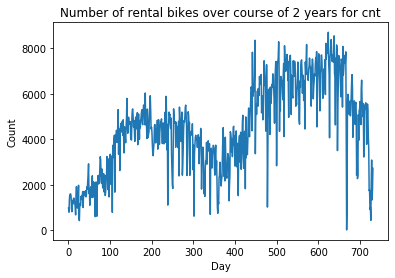

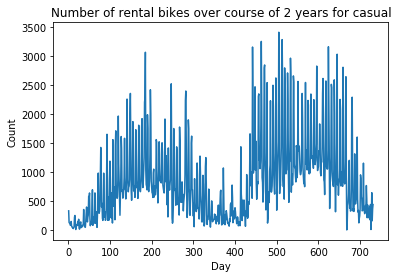

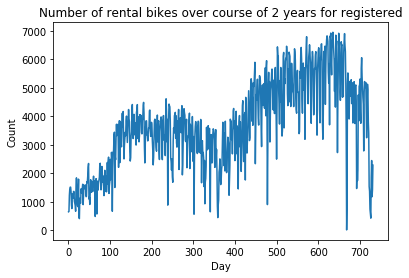

In [7]:
plt.plot(bike_df['instant'], bike_df['cnt'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for cnt")
plt.show()
plt.plot(bike_df['instant'], bike_df['casual'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for casual")
plt.show()
plt.plot(bike_df['instant'], bike_df['registered'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for registered")
plt.show()

In [8]:
video_df = pd.read_csv("online_video_dataset/transcoding_mesurment.tsv", sep='\t')
print(video_df.head(5))

            id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  225

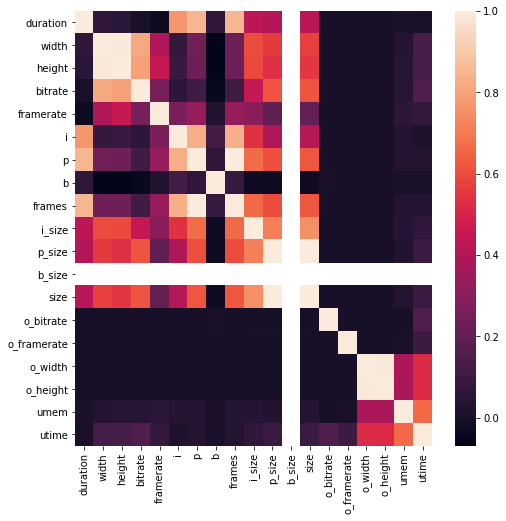

In [9]:
CorrelationHeatmap(video_df)

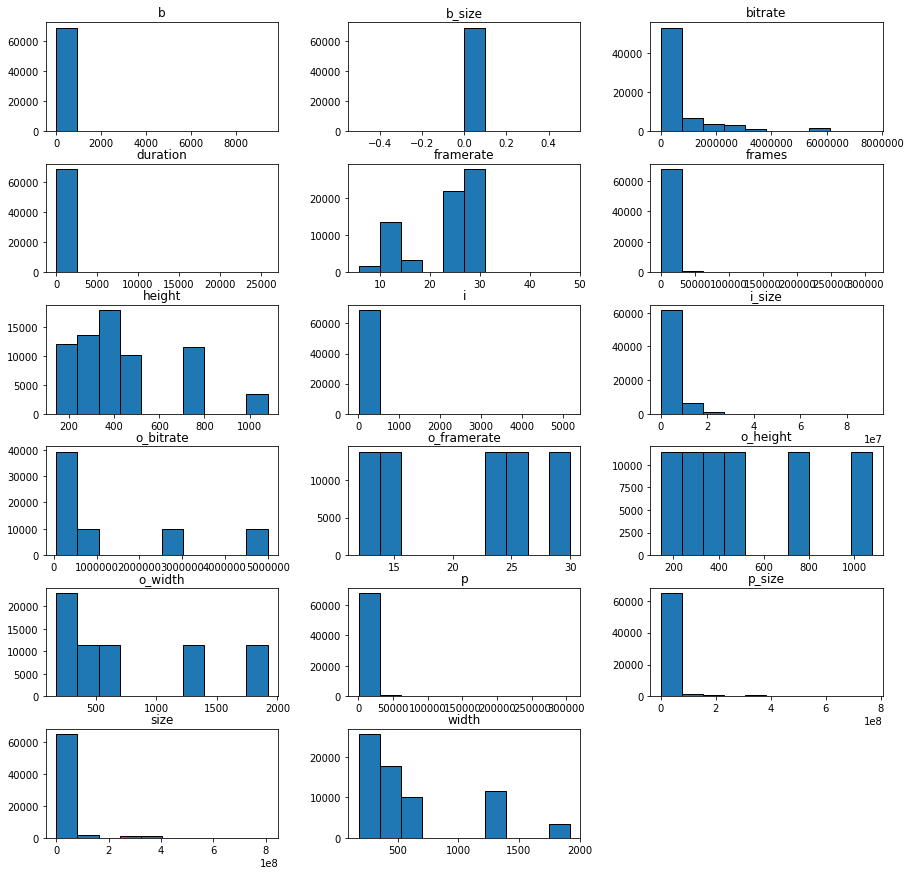

In [10]:
NumericalFeatureHistogram(video_df, "video")

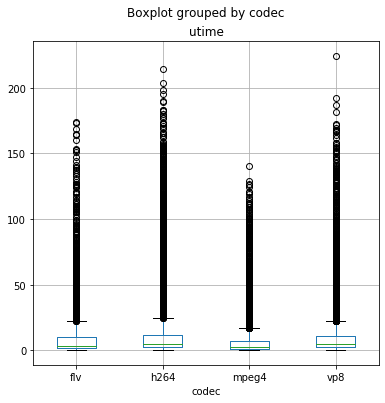

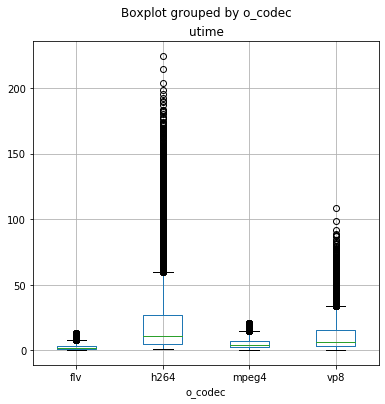

In [11]:
CategoricalFeatureBoxplot(video_df, "video")

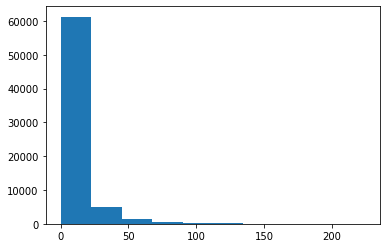

Mean of transcoding times: 9.996354820888516
Median of transcoding times: 4.408


In [12]:
plt.hist(video_df['utime'])
plt.show()
print("Mean of transcoding times:", np.mean(video_df['utime']))
print("Median of transcoding times:", np.median(video_df['utime']))

In [13]:
def TestFeatures(df, dataset): # TODO: fix this for categorical features
    target_col = "cnt" if dataset == "bike" else "utime"
    target = df[target_col]
    df = df.drop(columns=target_col)
    data = df.values
    
    f_test, _ = f_regression(data, target)
    f_test /= np.max(f_test)

    mi = mutual_info_regression(data, target)
    mi /= np.max(mi)
    
    for i, col in enumerate(df.columns):
        print("{} - f score: {}, mi score: {}".format(col, f_test[i], mi[i]))

def EncodeAndStandardize(df, dataset):
    if dataset == "bike":
        rem_col = ["instant", "dteday", "casual", "registered"] #remove other features here
        cat_col = ["season", "weekday", "weathersit"] #mnth
        num_col = ["temp", "atemp", "hum", "windspeed"]
    elif dataset == "video":
        rem_col = ["id", "umem"]
        cat_col = ["codec", "o_codec"]
        num_col = ["duration", "height", "width", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", "b_size", "size", "o_bitrate", "o_framerate", "o_width", "o_height"]
        
    df = df.drop(columns=rem_col) # drop features
    for col in num_col: # standardize numerical features
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    for col in cat_col: # encode categorical features
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1).drop([col], axis=1)

    return df    

In [14]:
scaled_bike_df = EncodeAndStandardize(bike_df, "bike")
print(scaled_bike_df.head(2))

   yr  mnth  holiday  workingday      temp     atemp       hum  windspeed  \
0   0     1        0           0 -0.826662 -0.679946  1.250171  -0.387892   
1   0     1        0           0 -0.721095 -0.740652  0.479113   0.749602   

   cnt  season_1  ...  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0  985         1  ...          0          0          0          0          0   
1  801         1  ...          1          0          0          0          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  
0          0          1             0             1             0  
1          0          0             0             1             0  

[2 rows x 23 columns]


In [15]:
scaled_video_df = EncodeAndStandardize(video_df, "video")
print(scaled_video_df.head(2))

   duration     width    height   bitrate  framerate         i        p  \
0  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   
1  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.871457 -0.82206   

          b    frames    i_size  ...  o_height  utime  codec_flv  codec_h264  \
0 -0.098879 -0.825201 -0.641488  ... -1.138803  0.612          0           0   
1 -0.098879 -0.825201 -0.641488  ... -0.834975  0.980          0           0   

   codec_mpeg4  codec_vp8  o_codec_flv  o_codec_h264  o_codec_mpeg4  \
0            1          0            0             0              1   
1            1          0            0             0              1   

   o_codec_vp8  
0            0  
1            0  

[2 rows x 26 columns]


In [16]:
TestFeatures(scaled_bike_df, "bike")

yr - f score: 0.7148668340376637, mi score: 0.597314428382387
mnth - f score: 0.12851916377396827, mi score: 0.8060675433246733
holiday - f score: 0.007091741052579161, mi score: 0.0246938818699822
workingday - f score: 0.005672541883169538, mi score: 0.054635780549004004
temp - f score: 0.9813814493974297, mi score: 0.8356179481739565
atemp - f score: 1.0, mi score: 1.0
hum - f score: 0.015466625198484935, mi score: 0.09930724410932493
windspeed - f score: 0.08796240528337745, mi score: 0.12096398157581804
season_1 - f score: 0.7015536818426922, mi score: 0.4175927941361814
season_2 - f score: 0.0330015423821954, mi score: 0.007730147903109302
season_3 - f score: 0.2061523453227466, mi score: 0.15545658027517884
season_4 - f score: 0.006529110689140652, mi score: 0.07223462942967238
weekday_0 - f score: 0.005151241373819845, mi score: 0.0
weekday_1 - f score: 0.001870927665740796, mi score: 0.008171611458464133
weekday_2 - f score: 2.6666953326666097e-06, mi score: 0.0
weekday_3 - f s

In [17]:
# TestFeatures(scaled_video_df, "video")

In [27]:
def EvalModel(model, data, target):
    rmse_func = make_scorer(mean_squared_error, squared=False)
    res = cross_validate(model, data, target, cv=10, scoring=rmse_func, return_train_score=True)
    train_rmse = np.mean(res['train_score'])
    test_rmse = np.mean(res['test_score'])
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)

In [29]:
bike_target = scaled_bike_df["cnt"]
bike_data_df = scaled_bike_df.drop(columns="cnt")
bike_data = bike_data_df.values

EvalModel(LinearRegression(), bike_data, bike_target)

Train RMSE: 796.7698408468711
Test RMSE: 898.1630729439821


In [30]:
video_target = scaled_video_df["utime"]
video_data_df = scaled_video_df.drop(columns="utime")
video_data = video_data_df.values

EvalModel(LinearRegression(), video_data, video_target)

Train RMSE: 10.997182400947436
Test RMSE: 442883824.8163164
